In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

{'negative': 1193, 'neutral': 419, 'positive': 2388}


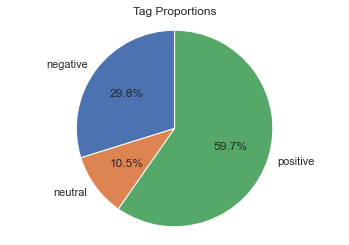

loss_weight: {'positive': 1.6750418760469012, 'neutral': 9.546539379474941, 'negative': 3.352891869237217}


In [11]:
tag_counter = {}
total = 0
with open('data/train.txt', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        total += 1
        tag = row[1]
        if tag not in tag_counter:
            tag_counter[tag] = 1
        else:
            tag_counter[tag] += 1

print(tag_counter)
data_df = pd.DataFrame(list(tag_counter.items()), columns=['Tag', 'Count'])
data_df['Percentage'] = data_df['Count'] / data_df['Count'].sum() * 100
fig, ax = plt.subplots()
ax.pie(data_df['Percentage'], labels=data_df['Tag'], autopct='%1.1f%%', startangle=90)
plt.title('Tag Proportions')
ax.axis('equal')
plt.show()

loss_weight = {}
loss_weight.update({'positive' : 1 / (tag_counter['positive'] / total)})
loss_weight.update({'neutral' : 1 / (tag_counter['neutral'] / total)})
loss_weight.update({'negative' : 1 / (tag_counter['negative'] / total)})
print("loss_weight:", loss_weight)


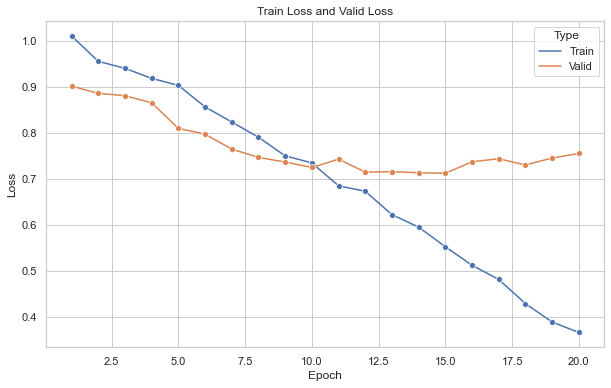

In [20]:
epochs = list(range(1, 21))
train_losses = [1.0109, 0.9558, 0.9406, 0.9187, 0.9035, 0.8567, 0.8238, 0.7908, 0.7503, 0.7349, 0.6851, 0.6733, 0.62244, 0.5953, 0.5527, 0.5124, 0.4815, 0.4291, 0.3890, 0.3663]
valid_losses = [0.9018, 0.8861, 0.8811, 0.8656, 0.8101, 0.7974, 0.7649, 0.7469, 0.7369, 0.7250, 0.7430, 0.7150, 0.7159, 0.7135, 0.7125, 0.7374, 0.7440, 0.7304, 0.7455, 0.7554]

# 创建 DataFrame
import pandas as pd

data = pd.DataFrame({
    "Epoch": epochs * 2,
    "Loss": train_losses + valid_losses,
    "Type": ["Train"] * len(epochs) + ["Valid"] * len(epochs)
})

# 使用 Seaborn 绘制折线图
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Epoch", y="Loss", hue="Type", marker="o")

# 设置标题和坐标轴标签
plt.title("Train Loss and Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# 显示图像
plt.show()

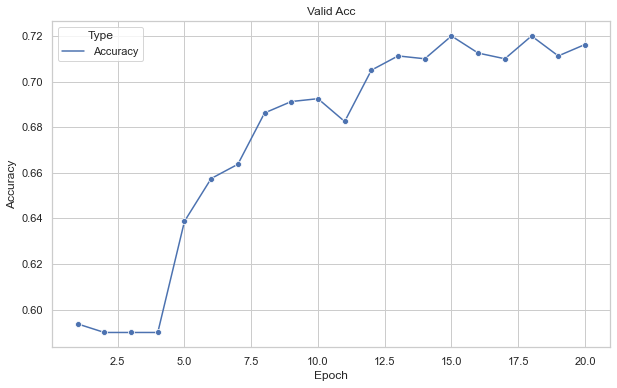

In [23]:
epochs = list(range(1, 21))
valid_acc = [0.59375, 0.59, 0.59, 0.59, 0.63875, 0.6575, 0.66375, 0.68625, 0.69125, 0.6925, 0.6825, 0.705, 0.71125, 0.71, 0.72, 0.7125, 0.71, 0.72, 0.71125, 0.71625]

# 创建 DataFrame
import pandas as pd

data = pd.DataFrame({
    "Epoch": epochs,
    "Accuracy": valid_acc,
    "Type": ["Accuracy"] * len(epochs)
})

# 使用 Seaborn 绘制折线图
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Epoch", y="Accuracy", hue="Type", marker="o")

# 设置标题和坐标轴标签
plt.title("Valid Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# 显示图像
plt.show()